In [1]:
import alphien

Hello Kaliautkarsh98, welcome to Alphien!

Importing your Alphien sub-packages...

import alphien.data
import alphien.portfolio
import alphien.tutorial

Importing your Qlib functions...                                   from team:

import alphien.feature_scaling                                     # Oceans4
import alphien.TrendProcessing                                     # Oceans4
import alphien.myPayout                                            # Oceans4
import alphien.DataPreprocessing                                   # Oceans4

Alphien environment imported. Let's do some research now!


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.externals import joblib
from sklearn.svm import SVR
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [3]:
dl = alphien.data.DataLoader()

In [4]:
dataGen = dl.batch()
data = next(dataGen)

In [5]:
print(type(data))
data.head()

<class 'pandas.core.frame.DataFrame'>


,Undl0volatm_6M,Undl0skew95.105_6M,Undl0curve95.105_6M,Undl0skew70.130_6M,Undl0curve70.130_6M,Undl0volatm_1Y,Undl0skew95.105_1Y,Undl0curve95.105_1Y,Undl0skew70.130_1Y,Undl0curve70.130_1Y,...,Undl2svc,Undl0mr,Undl1mr,Undl2mr,"ContractFeature_Autocall,BarrierLevel,LevelInitial","ContractFeature_ExpiryPayment,BarrierLevel","ContractFeature_ExpiryPayment,KickInPaymentGearing_ENCODED","ContractFeature_Schedule,EndDate_ENCODED","ContractFeature_Schedule,PeriodFrequency_ENCODED",val_lvsvcharge
27000,0.199696,-0.639256,0.548851,-0.522159,0.271453,0.175803,-0.289374,0.207985,-0.2683,0.141526,...,-0.51,1.32,1.27,1.065,1.0,0.50,1.0,1,4.0,0.011354
27001,0.199696,-0.639256,0.548851,-0.522159,0.271453,0.175803,-0.289374,0.207985,-0.2683,0.141526,...,-0.51,1.32,1.27,1.065,1.0,0.50,2.0,1,4.0,0.018649
27002,0.199696,-0.639256,0.548851,-0.522159,0.271453,0.175803,-0.289374,0.207985,-0.2683,0.141526,...,-0.51,1.32,1.27,1.065,1.0,0.50,1.0,1,12.0,0.014786
27003,0.199696,-0.639256,0.548851,-0.522159,0.271453,0.175803,-0.289374,0.207985,-0.2683,0.141526,...,-0.51,1.32,1.27,1.065,1.0,0.50,2.0,1,12.0,0.023954
27004,0.199696,-0.639256,0.548851,-0.522159,0.271453,0.175803,-0.289374,0.207985,-0.2683,0.141526,...,-0.51,1.32,1.27,1.065,1.0,0.55,1.0,1,4.0,0.012308


In [6]:
def feature_scaling(df):
    features=df.columns
    df[features]=scaler.fit_transform(df[features])
    return df

In [7]:
data=feature_scaling(data)

In [8]:
selected_features=[]
def feature_selection(df):
    x=df.drop("val_lvsvcharge",axis=1)
    y=df["val_lvsvcharge"]
    reg = LassoCV()
    reg.fit(x, y)
    print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
    print("Best score using built-in LassoCV: %f" %reg.score(x,y))
    coef = pd.Series(reg.coef_, index = x.columns)
    print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
    imp_coef = coef.sort_values()
    import matplotlib
    matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using Lasso Model")
    data_temp=df.iloc[:,:-1]
    for df1 in data_temp:
        if(coef[df1]==0):
            del df[df1]
        else :
            selected_features.append(df1)
    return df

In [9]:
def rmse_error(y_test,y_pred):
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    rmse
    return rmse

In [10]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    print(IQR)
    df =df[~((df< (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
    df.shape
    return df

In [11]:
##Data engineering step 
def engineerdata(df): 
    df=feature_scaling(df)
    df=remove_outliers(df)
    df=feature_selection(df)
    return df

Undl0volatm_6M                                                1.801064
Undl0skew95.105_6M                                            1.983449
Undl0curve95.105_6M                                           2.052821
Undl0skew70.130_6M                                            1.247966
Undl0curve70.130_6M                                           1.103551
                                                                ...   
ContractFeature_ExpiryPayment,BarrierLevel                    1.740789
ContractFeature_ExpiryPayment,KickInPaymentGearing_ENCODED    2.000000
ContractFeature_Schedule,EndDate_ENCODED                      1.414221
ContractFeature_Schedule,PeriodFrequency_ENCODED              2.000000
val_lvsvcharge                                                1.042398
Length: 165, dtype: float64
Best alpha using built-in LassoCV: 0.010624
Best score using built-in LassoCV: 0.400916
Lasso picked 11 variables and eliminated the other 153 variables


['finalized_model.sav']

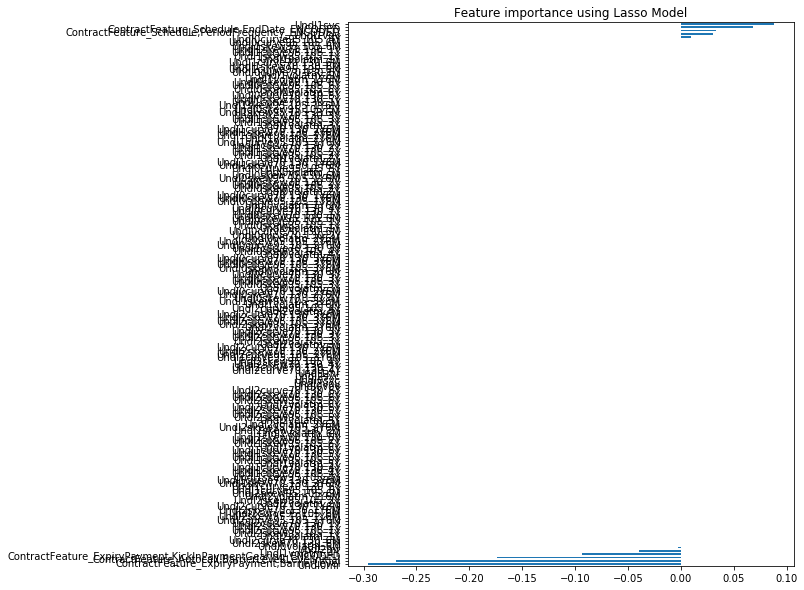

In [12]:
#training loop
error_list=[]
predictions_1=[]
results=[]
regressor=SVR(kernel='rbf')
dataGen = dl.batch(fromRow=1, toRow=100000) #reduce data to 500k rows
for i, d in enumerate(dataGen):
    d=engineerdata(d)
    x=d.drop(['val_lvsvcharge'],axis=1)
    y=d['val_lvsvcharge']
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)
    regressor.fit(x_train,y_train)
    y_pred=regressor.predict(x_test)
    predictions_1.append(y_pred)
    res=regressor.score(x_test,y_test)
    results.append(res)
    error_list.append(rmse_error(y_test,y_pred))

##saving the base model in a file so as to use it again 
filename = 'finalized_model.sav'
joblib.dump(regressor, filename)

In [13]:
selected_features

['Undl0curve95.105_4Y',
 'Undl1volatm_4Y',
 'Undl1vov',
 'Undl1svc',
 'Undl0mr',
 'Undl2mr',
 'ContractFeature_Autocall,BarrierLevel,LevelInitial',
 'ContractFeature_ExpiryPayment,BarrierLevel',
 'ContractFeature_ExpiryPayment,KickInPaymentGearing_ENCODED',
 'ContractFeature_Schedule,EndDate_ENCODED',
 'ContractFeature_Schedule,PeriodFrequency_ENCODED']

In [14]:
len(selected_features)

11

In [15]:
##Data engineering step 
def engineerdata_test(df): 
    df=feature_scaling(df)
    df=remove_outliers(df)
    #df=feature_selection(df)
    return df

In [16]:
def select_training_features(dataset):
    df_final={}
    df_final=pd.DataFrame(df_final)
    for df in dataset:
        if(df in selected_features):
            df_final[df]=dataset[df]
            print(df)
    return df_final

In [ ]:
##applying the saved model on unseen data 
unseen = dl.batch(fromRow=600000, toRow=700000) #data generator function applied to access data in batches
predictions=[] ## predictions are stored in form of list 
results=[]
accuracy=[]
loaded_model = joblib.load(filename) #load the saved model 
for data in unseen:
    y=data['val_lvsvcharge']
    data = engineerdata_test(data) #apply feature transform
    data=select_training_features(data)
    ypred = loaded_model.predict(data) 
    predictions.append(ypred)
    accuracy.append(rmse_error(y_test,y_pred))

Undl0volatm_6M                                                1.409094
Undl0skew95.105_6M                                            1.409092
Undl0curve95.105_6M                                           1.409097
Undl0skew70.130_6M                                            1.409093
Undl0curve70.130_6M                                           1.409094
                                                                ...   
ContractFeature_ExpiryPayment,BarrierLevel                    1.740762
ContractFeature_ExpiryPayment,KickInPaymentGearing_ENCODED    2.000000
ContractFeature_Schedule,EndDate_ENCODED                      1.414205
ContractFeature_Schedule,PeriodFrequency_ENCODED              2.000000
val_lvsvcharge                                                1.027498
Length: 165, dtype: float64
Undl0curve95.105_4Y
Undl1volatm_4Y
Undl1vov
Undl1svc
Undl0mr
Undl2mr
ContractFeature_Autocall,BarrierLevel,LevelInitial
ContractFeature_ExpiryPayment,BarrierLevel
ContractFeature_ExpiryPaymen

In [ ]:
accuracy